In [14]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [15]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [17]:
train_images.shape

(60000, 28, 28)

In [18]:
len(train_labels)

60000

In [19]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
test_images.shape

(10000, 28, 28)

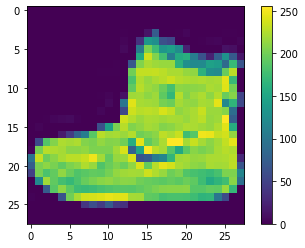

In [21]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [22]:
train_images = train_images / 255.0

test_images = test_images / 255.0

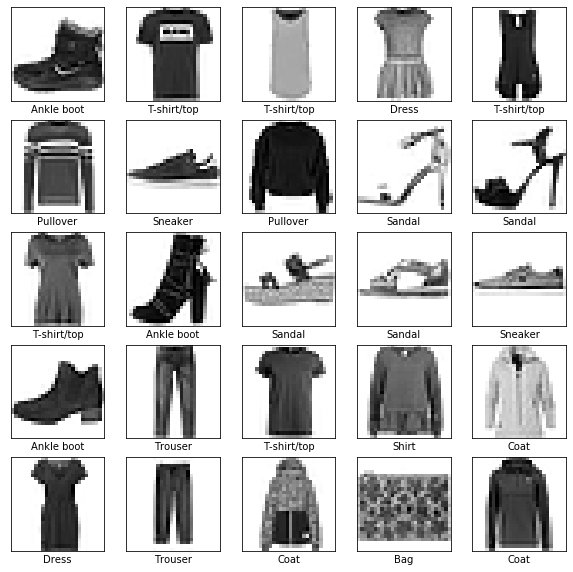

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4990 - acc: 0.8256
Epoch 2/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3714 - acc: 0.8663
Epoch 3/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3351 - acc: 0.8778
Epoch 4/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3116 - acc: 0.8854
Epoch 5/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2946 - acc: 0.8903
Epoch 6/10
60000/60000 [==============================] - 2s 42us/sample - loss: 0.2823 - acc: 0.8948
Epoch 7/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2692 - acc: 0.9004
Epoch 8/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2581 - acc: 0.9037
Epoch 9/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2481 - acc: 0.9067
Epoch 10/10
60000/60000 [==============================] - 3s 43us/sample - loss: 

In [27]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3261 - acc: 0.8877

Test accuracy: 0.8877


In [28]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [29]:
predictions = probability_model.predict(test_images)

In [30]:
predictions[0]

array([1.4259068e-06, 1.8705485e-07, 1.7483849e-07, 4.7406910e-08,
       4.1454840e-07, 6.5734456e-03, 3.1191465e-07, 1.0844496e-02,
       1.8188590e-08, 9.8257947e-01], dtype=float32)

In [31]:
np.argmax(predictions[0])

9

In [32]:
test_labels[0]

9

In [33]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

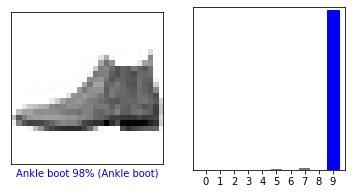

In [34]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

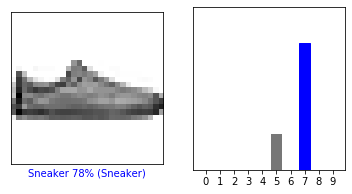

In [35]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()



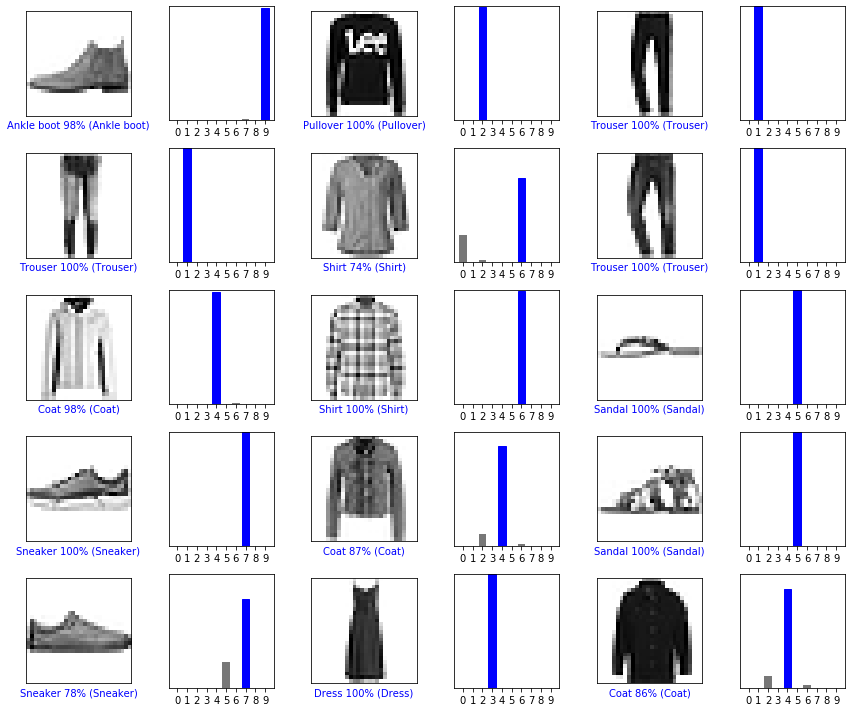

In [36]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [37]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [38]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [39]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.9262513e-04 1.1251012e-12 9.9514163e-01 7.2753110e-08 2.4825379e-03
  1.8222652e-14 2.1829985e-03 1.4693005e-14 1.2003604e-08 3.8579159e-08]]


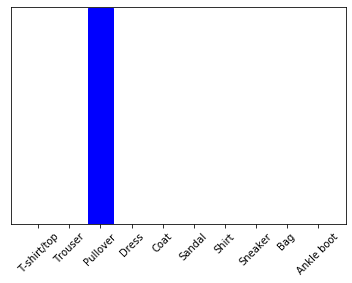

In [40]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [41]:
np.argmax(predictions_single[0])

2